In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
# Load the dataset
file_path = 'Churn_Modelling.csv'
df = pd.read_csv(file_path)

In [4]:
# Drop unnecessary columns
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

In [5]:
# Encode categorical variables
label_enc = LabelEncoder()
df["Gender"] = label_enc.fit_transform(df["Gender"]) 
df = pd.get_dummies(df, columns=["Geography"], drop_first=True) 

In [6]:
# Split data into features and target
X = df.drop(columns=["Exited"])
y = df["Exited"]

In [7]:
# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Train RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
# Predictions
y_pred = model.predict(X_test)

In [11]:
# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [12]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

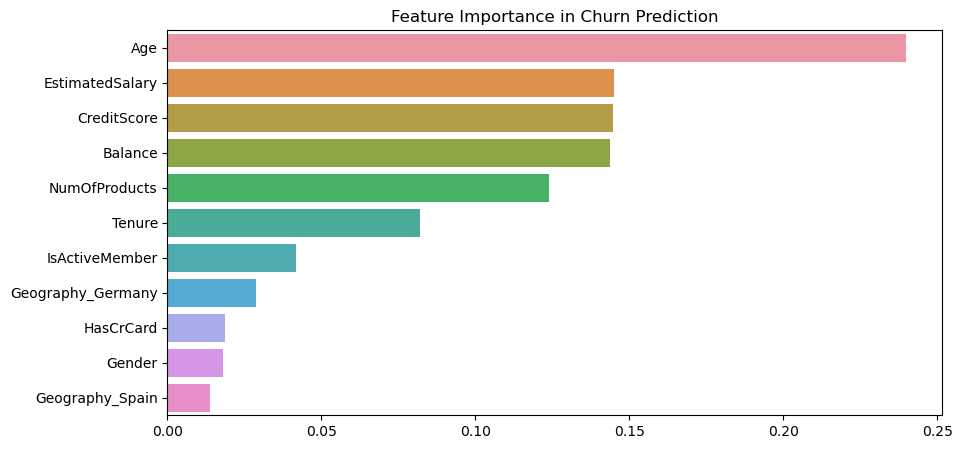

In [13]:
# Visualization
plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title("Feature Importance in Churn Prediction")
plt.show()

In [14]:
# Print evaluation metrics
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.861
Confusion Matrix:
 [[1537   56]
 [ 222  185]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

